<a href="https://colab.research.google.com/github/IainMac32/ArtSuggesterAI/blob/main/ArtSuggesterModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt


import os
import requests
from PIL import Image
from io import BytesIO

from PIL import Image, ImageEnhance
import random
import numpy as np


Mounted at /content/drive


# Load and Preprocess Images

In [ ]:

image_folder = '/content/drive/My Drive/Colab Notebooks/MediumDataSet/'

# angela / harrison
categories = {'markers': 0, 'pencilcrayons': 1, 'paints': 2}
data_list = []
label_list = []

# Function to apply data augmentation
def augment_image(img):
    # Random rotation
    if random.random() > 0.5:
        angle = random.randint(-30, 30)
        img = img.rotate(angle)

    # Random horizontal flip
    if random.random() > 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)

    # Random brightness adjustment
    if random.random() > 0.5:
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(random.uniform(0.7, 1.3))

    # Random contrast adjustment
    if random.random() > 0.5:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(random.uniform(0.8, 1.2))

    # Random color adjustment
    if random.random() > 0.5:
        enhancer = ImageEnhance.Color(img)
        img = enhancer.enhance(random.uniform(0.8, 1.2))

    return img

for category, label in categories.items():
    category_path = os.path.join(image_folder, category)  # path to the medium type folder

    for img_name in os.listdir(category_path):  # for each image in the medium type folder
        img_path = os.path.join(category_path, img_name)  # construct the path to the image

        try:
            # Open and preprocess the original image
            img = Image.open(img_path).convert('RGB')
            img = img.resize((128, 128))

            # Add original image to list
            img_array = np.array(img) / 255.0  # convert to NumPy and normalize
            data_list.append(img_array)
            label_list.append(label)

            # Apply data augmentation and add augmented image to list
            augmented_img = augment_image(img)
            augmented_img_array = np.array(augmented_img) / 255.0
            data_list.append(augmented_img_array)
            label_list.append(label)

            #augment again?
            augmented_img = augment_image(img)
            augmented_img_array = np.array(augmented_img) / 255.0
            data_list.append(augmented_img_array)
            label_list.append(label)


        except Exception as e:
            print(f"Error loading {img_name}: {e}")

# Convert lists of images/labels to NumPy arrays
data_np = np.array(data_list)
label_np = np.array(label_list)

# Shuffle both arrays with the same permutation
idx_permutation = np.random.permutation(len(data_np))
data_np = data_np[idx_permutation]
label_np = label_np[idx_permutation]

# Split the data into training and testing sets
split = len(data_np) // 10 * 9
train_data_np = data_np[:split]
train_label_np = label_np[:split]
test_data_np = data_np[split:]
test_label_np = label_np[split:]


# Define Model new

In [ ]:
#new

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(128, 128, 3)),

    # Block 1
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Block 2
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Block 3
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Block 4
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Block 5
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Classifier block
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes for the output
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


In [ ]:
#new

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(128, 128, 3)),  # Input layer

    # Block 1: Convolution + MaxPooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # 32 filters, 3x3 kernel
    tf.keras.layers.MaxPooling2D(2, 2),  # MaxPooling with pool size 2x2

    # Block 2: Convolution + MaxPooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # 64 filters, 3x3 kernel
    tf.keras.layers.MaxPooling2D(2, 2),  # MaxPooling with pool size 2x2

    # Flatten the output from the convolutions
    tf.keras.layers.Flatten(),

    # Fully connected layer
    tf.keras.layers.Dense(128, activation='relu'),  # 128 units

    # Output layer with 3 categories (softmax for multi-class classification)
    tf.keras.layers.Dense(3, activation='softmax')  # 3 units for 3 categories
])

In [ ]:
model.load_weights('model_79_Acc.weights.h5')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=['accuracy'],
)

# Train the Model

In [ ]:
checkpoint_path = "model_checkpoint.weights.h5"  # Specify your checkpoint file path
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,         # Where to save the model
    save_weights_only=True,           # Save only weights
    monitor='val_accuracy',               # Metric to monitor
    save_best_only=True,             # Save every checkpoint
    mode='max',                       # Save the model with the minimum validation loss
    save_freq='epoch'                 # Save the model every epoch
)

model.fit(
    x=train_data_np,
    y=train_label_np,
    batch_size=8,
    epochs=1,
    validation_split=0.1,
    shuffle=True,
    validation_freq=1,
    callbacks=[model_checkpoint_callback]
)

262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.7639 - val_loss: 0.9961


# Test and Save Model


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_np, test_label_np)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8065 - loss: 0.9229


In [ ]:
model.save('model_80_Acc.keras')



In [ ]:
model = tf.keras.models.load_model("model_80_Acc.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


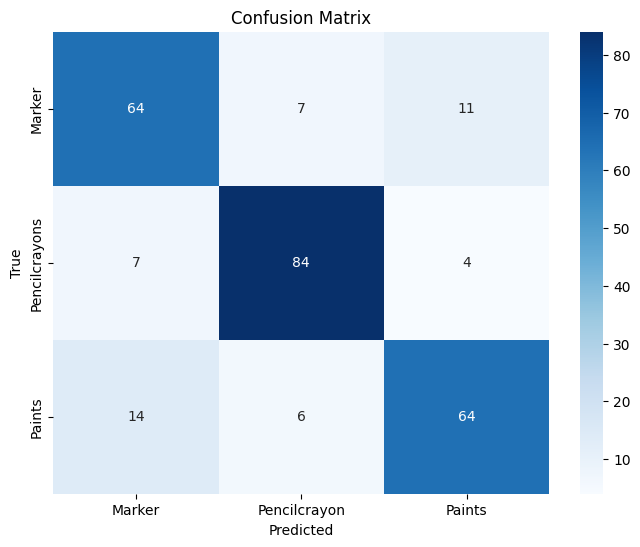

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you already have your model trained on train_data_np and train_label_np

# Make predictions on the test set
y_pred = model.predict(test_data_np)  # Use test data for predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels (index of max probability)

# Compute confusion matrix
cm = confusion_matrix(test_label_np, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Marker', 'Pencilcrayon', 'Paints'],
            yticklabels=['Marker', 'Pencilcrayons', 'Paints'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
